In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [3]:
print(os.listdir())

['ETF_Analysis.ipynb', '.DS_Store', 'Guidelines_ Requirements', 'data cleanup.ipynb', 'Resources', 'Output', 'readme.md', '.gitignore', '.env', '.ipynb_checkpoints', '.git', 'Project 1.ipynb']


In [5]:
df = pd.read_csv("./Resources/canada_household_econimic_data.csv")

In [6]:
df

,"Income, consumption and savings",2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Household disposable income,"615,286","642,584","663,239","695,238","721,510","774,375","816,321","862,404","884,783",...,"1,046,791","1,081,654","1,129,875","1,132,763","1,189,366","1,224,919","1,280,362","1,387,360","1,444,569","1,520,693"
1,Compensation of employees,"574,278","596,782","620,600","656,154","692,609","737,321","782,564","818,108","810,556",...,"959,181","996,247","1,024,742","1,024,142","1,066,523","1,122,304","1,168,597","1,155,842","1,264,592","1,383,129"
2,Net mixed income,"107,636","111,748","116,533","122,301","125,661","131,002","138,842","143,917","144,671",...,"167,712","172,078","177,994","183,581","190,323","195,618","207,999","207,211","217,267","237,720"
3,Property income received,"116,942","109,346","108,675","113,209","122,970","137,105","153,667","160,013","152,106",...,"175,342","181,876","198,218","189,502","202,189","202,278","217,587","212,221","215,883","241,202"
4,Less: property income paid,"41,204","37,300","39,081","40,156","43,309","52,632","61,313","63,921","55,559",...,"56,232","55,857","56,033","56,405","60,186","70,213","79,808","72,579","66,922","85,866"
5,Current transfers received,"145,676","147,574","153,189","160,966","165,651","182,779","194,544","204,188","218,275",...,"258,527","266,153","288,200","307,078","320,918","334,066","346,107","468,640","442,548","423,818"
6,Less: current transfers paid,"288,042","285,566","296,677","317,236","342,072","361,200","391,983","399,901","385,266",...,"457,739","478,843","503,246","515,135","530,401","559,134","580,120","583,975","628,799","679,310"
7,Social transfers in kind (STiK),"160,186","169,696","178,804","186,454","196,284","210,433","221,609","237,315","248,043",...,"284,952","293,102","302,807","312,884","324,515","336,961","349,855","369,336","396,554","429,133"
8,Social transfers in kind (STiK): education,"54,355","56,821","59,163","61,929","65,407","70,876","72,755","76,991","80,679",...,"91,034","93,513","95,214","97,284","101,239","105,131","108,075","112,949","114,611","122,578"
9,Social transfers in kind (STiK): health,"73,275","77,820","83,061","86,672","90,590","96,801","104,198","111,759","118,734",...,"139,633","144,998","150,809","155,903","161,159","165,903","172,933","185,450","210,157","227,467"


In [14]:
df.isnull()

,"Income, consumption and savings",2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df=df.dropna().copy()
df

,"Income, consumption and savings",2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Food and non-alcoholic beverages,"59,698","62,227","64,646","67,044","69,305","72,227","75,314","79,394","84,166",...,"94,538","98,670","102,658","105,137","109,628","111,574","115,912","128,000","129,710","138,047"
1,Alcoholic beverages and tobacco,"27,713","31,002","33,087","34,003","34,130","34,294","34,907","35,605","36,033",...,"40,679","42,050","43,354","44,523","45,376","48,672","48,571","50,546","51,010","51,749"
2,Clothing and footwear,"30,229","31,099","31,763","32,559","33,712","35,512","37,171","37,507","36,964",...,"42,358","44,626","47,299","47,876","49,289","61,997","63,586","50,408","58,853","69,437"
3,"Housing, water, electricity, gas and other fuels","139,341","145,400","153,520","160,413","168,562","177,060","188,322","200,145","205,828",...,"244,457","257,191","266,997","275,833","288,655","275,918","290,065","302,490","315,491","341,619"
4,"Furnishings, household equipment and other goo...","35,912","38,516","40,551","42,785","44,873","48,180","50,974","52,639","52,060",...,"55,877","58,285","60,547","62,858","65,200","76,452","79,251","84,579","93,833","97,809"
5,Health,"21,548","23,418","24,760","26,646","28,720","31,246","33,824","35,944","37,843",...,"44,037","45,717","47,935","50,188","52,376","51,350","53,421","49,194","53,959","59,541"
6,Transport,"90,542","97,163","101,244","105,296","113,683","120,288","128,871","134,707","125,375",...,"163,831","172,794","172,494","176,475","189,321","208,408","209,236","162,733","186,865","221,035"
7,Communications,"13,672","15,134","15,788","16,811","18,071","19,243","20,175","21,030","22,551",...,"26,831","28,184","29,495","30,697","33,112","32,218","33,337","33,158","33,534","35,056"
8,Recreation and culture,"61,600","64,807","67,024","69,501","72,867","76,571","80,747","83,203","83,559",...,"90,358","92,395","94,536","95,717","97,781","112,177","114,121","108,513","119,676","131,778"
9,Education,"6,346","6,936","7,873","8,326","8,991","9,562","10,189","10,973","11,838",...,"15,168","15,012","15,786","16,551","20,681","16,110","16,910","16,390","16,801","18,093"


In [16]:
df.isnull().sum()

Income, consumption and savings    0
2001                               0
2002                               0
2003                               0
2004                               0
2005                               0
2006                               0
2007                               0
2008                               0
2009                               0
2010                               0
2011                               0
2012                               0
2013                               0
2014                               0
2015                               0
2016                               0
2017                               0
2018                               0
2019                               0
2020                               0
2021                               0
2022                               0
dtype: int64

In [9]:
df.info()

df['Income, consumption and savings'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Income, consumption and savings  33 non-null     object
 1   2001                             33 non-null     object
 2   2002                             33 non-null     object
 3   2003                             33 non-null     object
 4   2004                             33 non-null     object
 5   2005                             33 non-null     object
 6   2006                             33 non-null     object
 7   2007                             33 non-null     object
 8   2008                             33 non-null     object
 9   2009                             33 non-null     object
 10  2010                             33 non-null     object
 11  2011                             33 non-null     object
 12  2012                             33 no

array(['Household disposable income', 'Compensation of employees',
       'Net mixed income', 'Property income received',
       'Less: property income paid', 'Current transfers received',
       'Less: current transfers paid', 'Social transfers in kind (STiK)',
       'Social transfers in kind (STiK): education',
       'Social transfers in kind (STiK): health',
       'Social transfers in kind (STiK): other',
       'Adjusted household disposable income',
       'Household final consumption expenditure (HFCE)',
       'Food and non-alcoholic beverages',
       'Alcoholic beverages and tobacco', 'Clothing and footwear',
       'Housing, water, electricity, gas and other fuels',
       'Furnishings, household equipment and other goods and services related to the dwelling and property',
       'Health', 'Transport', 'Communications', 'Recreation and culture',
       'Education', 'Food, beverage and accommodation services',
       'Insurance and financial services',
       'Miscellaneous

In [ ]:
# Selecting Consumption and Savings Data


In [4]:
Path = 'canada_CPI.csv'
df = pd.read_csv( Path, skiprows=1)

df.head()

,date,INDINF_CPI_Q,INDINF_CPI_TRIM_Q,INDINF_CPI_MEDIAN_Q,INDINF_CPI_COMMON_Q
0,1993Q1,2.2,2.0,2.0,1.8
1,1993Q2,1.8,1.9,1.9,1.7
2,1993Q3,1.8,1.8,1.7,1.4
3,1993Q4,1.8,1.8,1.7,1.5
4,1994Q1,0.5,1.5,1.6,1.3


In [5]:
#dropping all other table except the median

median_df = df.drop(columns = ['INDINF_CPI_Q','INDINF_CPI_TRIM_Q','INDINF_CPI_COMMON_Q'], axis =1)

#displaying the first five observations 
median_df.head()

,date,INDINF_CPI_MEDIAN_Q
0,1993Q1,2.0
1,1993Q2,1.9
2,1993Q3,1.7
3,1993Q4,1.7
4,1994Q1,1.6


In [6]:
#formating dates by removing Q1, Q2, Q3 and Q4

median_df["date"] = [date.split('Q')[0] for date in median_df["date"]]




#displaying the first five observations
median_df.head()

,date,INDINF_CPI_MEDIAN_Q
0,1993,2.0
1,1993,1.9
2,1993,1.7
3,1993,1.7
4,1994,1.6


In [7]:
#converting date 
median_df['date'] = pd.to_datetime(median_df['date'], format='%Y')
#summing observation with the same date

groupby_df=median_df.groupby (by = ['date']).sum()


#displaying the first five observations
groupby_df.head()  

,INDINF_CPI_MEDIAN_Q
date,
1993-01-01,7.3
1994-01-01,6.1
1995-01-01,7.6
1996-01-01,5.2
1997-01-01,4.5


In [8]:
start_date = '2001-01-01'
end_date = '2023-01-01'

# Filter the DataFrame based on the specified date range
filtered_df = groupby_df.loc[start_date:end_date]

#display the fil
filtered_df.head() 

,INDINF_CPI_MEDIAN_Q
date,
2001-01-01,8.7
2002-01-01,8.3
2003-01-01,8.3
2004-01-01,6.7
2005-01-01,7.4


In [9]:
mean_by_year = filtered_df.mean().round(3)


print("Mean from 2001-2023 of observation")
print(mean_by_year.values[0])

Mean from 2001-2023 of observation
8.604


<Axes: >

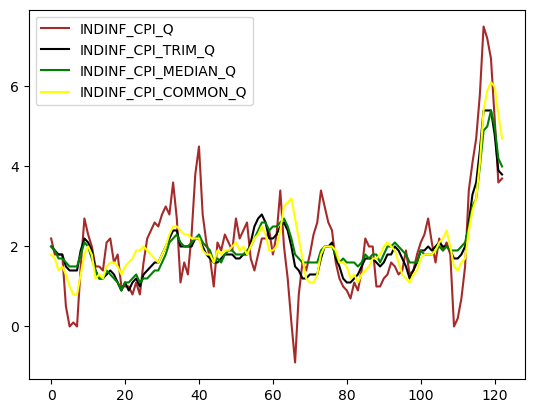

In [12]:
df.plot(kind='line', color = ['brown','black','green','yellow'])